In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.plotly as py 
from datetime import timedelta
import datetime
from fbprophet import Prophet

In [40]:
daily_df = pd.read_csv(os.path.join("Daily_air_data.csv"))

In [41]:
daily_df.head()

,Unnamed: 0,air_area_name,visit_date,visitors,air_genre_name,day_of_week,holiday_flg
0,0,Tōkyō-to Minato-ku Shibakōen,2016-01-13,25,Dining bar,Wednesday,0
1,1,Tōkyō-to Shinagawa-ku Higashigotanda,2016-01-13,21,Izakaya,Wednesday,0
2,2,Tōkyō-to Minato-ku Shibakōen,2016-01-13,40,Izakaya,Wednesday,0
3,3,Tōkyō-to Minato-ku Shibakōen,2016-01-13,5,Dining bar,Wednesday,0
4,4,Shizuoka-ken Hamamatsu-shi Motoshirochō,2016-01-13,18,Cafe/Sweets,Wednesday,0


In [42]:
daily_df = daily_df.drop(['Unnamed: 0'], axis=1)

In [43]:
daily_df.head()

,air_area_name,visit_date,visitors,air_genre_name,day_of_week,holiday_flg
0,Tōkyō-to Minato-ku Shibakōen,2016-01-13,25,Dining bar,Wednesday,0
1,Tōkyō-to Shinagawa-ku Higashigotanda,2016-01-13,21,Izakaya,Wednesday,0
2,Tōkyō-to Minato-ku Shibakōen,2016-01-13,40,Izakaya,Wednesday,0
3,Tōkyō-to Minato-ku Shibakōen,2016-01-13,5,Dining bar,Wednesday,0
4,Shizuoka-ken Hamamatsu-shi Motoshirochō,2016-01-13,18,Cafe/Sweets,Wednesday,0


In [44]:
better_daily_df = daily_df.drop(['air_genre_name'], axis=1)

In [45]:
better_daily_df.head()

,air_area_name,visit_date,visitors,day_of_week,holiday_flg
0,Tōkyō-to Minato-ku Shibakōen,2016-01-13,25,Wednesday,0
1,Tōkyō-to Shinagawa-ku Higashigotanda,2016-01-13,21,Wednesday,0
2,Tōkyō-to Minato-ku Shibakōen,2016-01-13,40,Wednesday,0
3,Tōkyō-to Minato-ku Shibakōen,2016-01-13,5,Wednesday,0
4,Shizuoka-ken Hamamatsu-shi Motoshirochō,2016-01-13,18,Wednesday,0


In [46]:
indexed_daily = better_daily_df.set_index(['air_area_name', 'visit_date']) 
indexed_daily.head()

visitors day_of_week  \
air_area_name                           visit_date                         
Tōkyō-to Minato-ku Shibakōen            2016-01-13        25   Wednesday   
Tōkyō-to Shinagawa-ku Higashigotanda    2016-01-13        21   Wednesday   
Tōkyō-to Minato-ku Shibakōen            2016-01-13        40   Wednesday   
                                        2016-01-13         5   Wednesday   
Shizuoka-ken Hamamatsu-shi Motoshirochō 2016-01-13        18   Wednesday   

                                                    holiday_flg  
air_area_name                           visit_date               
Tōkyō-to Minato-ku Shibakōen            2016-01-13            0  
Tōkyō-to Shinagawa-ku Higashigotanda    2016-01-13            0  
Tōkyō-to Minato-ku Shibakōen            2016-01-13            0  
                                        2016-01-13            0  
Shizuoka-ken Hamamatsu-shi Motoshirochō 2016-01-13            0

In [47]:
indexed_daily = indexed_daily.sort_values(['air_area_name', 'visit_date'])
indexed_daily.head()

visitors day_of_week  holiday_flg
air_area_name                  visit_date                                   
Fukuoka-ken Fukuoka-shi Daimyō 2016-01-01        21      Friday            1
                               2016-01-01        29      Friday            1
                               2016-01-01         3      Friday            1
                               2016-01-01        33      Friday            1
                               2016-01-02         8    Saturday            1

In [48]:
indexed_daily2 = indexed_daily.groupby(['air_area_name','visit_date'], as_index=False).agg({'visitors': 'sum'})

In [50]:
indexed_daily2 = daily_df.drop(['day_of_week', 'air_genre_name'], axis=1)
indexed_daily2 = indexed_daily2.sort_values(['air_area_name', 'visit_date'])
indexed_daily2.head()

,air_area_name,visit_date,visitors,holiday_flg
251928,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,21,1
251944,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,29,1
251948,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,3,1
251961,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,33,1
252063,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-02,8,1


In [51]:
indexed_daily2 = indexed_daily2.set_index(['air_area_name', 'visit_date', 'holiday_flg']) 
indexed_daily2.head()

visitors
air_area_name                  visit_date holiday_flg          
Fukuoka-ken Fukuoka-shi Daimyō 2016-01-01 1                  21
                                          1                  29
                                          1                   3
                                          1                  33
                               2016-01-02 1                   8

In [81]:
final = indexed_daily2.groupby(['air_area_name', 'visit_date', 'holiday_flg'], as_index=True).agg({"visitors": "sum"})
final = final.reset_index()
final.tail()

,air_area_name,visit_date,holiday_flg,visitors
44339,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-18,0,66
44340,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-19,0,54
44341,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-20,0,42
44342,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-21,0,96
44343,Ōsaka-fu Ōsaka-shi Ōhiraki,2017-04-22,0,107


In [70]:
area_array = list(final["air_area_name"].unique())
len(area_array)
first = area_array[0]

In [82]:
final['visit_date'][44343]

'2017-04-22'

In [83]:
if final['visit_date'] >= '2017-04-01'

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
44314    False
44315    False
44316    False
44317    False
44318    False
44319    False
44320    False
44321    False
44322     True
44323     True
44324     True
44325     True
44326     True
44327     True
44328     True
44329     True
44330     True
44331     True
44332     True
44333     True
44334     True
44335     True
44336     True
44337     True
44338     True
44339     True
44340     True
44341     True
44342     True
44343     True
Name: visit_date, Length: 44344, dtype: bool

In [97]:
ds = []
y = []
ds_predict = []
y_predict = []

for index, row in final.iterrows():
    if row['air_area_name'] == first:
            if row['visit_date'] < '2017-04-01':
                ds.append(row['visit_date'])
                y.append(row['visitors'])
            elif row['visit_date'] >= '2017-04-01':
                ds_predict.append(row['visit_date'])
                y_predict.append(row['visitors'])
        

In [98]:
Fukuoka = ({
    "ds": ds,
    "y": y
})
df =pd.DataFrame.from_dict(Fukuoka)

In [102]:
Fukuoka_actual = ({
    "ds": ds_predict,
    "y": y_predict
})
actual =pd.DataFrame.from_dict(Fukuoka_actual)

In [109]:
df.tail()

,ds,y
451,2017-03-27,1045
452,2017-03-28,1081
453,2017-03-29,1300
454,2017-03-30,1239
455,2017-03-31,1269


actual.tail()

In [110]:
m1 = Prophet(daily_seasonality=True)
m1.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [111]:
future1 = m1.make_future_dataframe(periods=22)
forecast1 = m1.predict(future1)
forecast1.tail().T

,473,474,475,476,477
ds,2017-04-18 00:00:00,2017-04-19 00:00:00,2017-04-20 00:00:00,2017-04-21 00:00:00,2017-04-22 00:00:00
trend,973.659,973.941,974.223,974.505,974.787
yhat_lower,763.181,849.023,888.132,1046.85,1189.97
yhat_upper,1236.73,1330.42,1339.88,1499.21,1679.45
trend_lower,969.68,969.544,969.314,969.078,968.719
trend_upper,977.752,978.415,979.138,980.187,980.865
additive_terms,24.3262,121.373,131.902,290.855,470.084
additive_terms_lower,24.3262,121.373,131.902,290.855,470.084
additive_terms_upper,24.3262,121.373,131.902,290.855,470.084
daily,179.812,179.812,179.812,179.812,179.812


In [148]:
forecast =forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(22)

In [149]:
forecast

,ds,yhat,yhat_lower,yhat_upper
456,2017-04-01,1438.951124,1189.601696,1675.078585
457,2017-04-02,1164.692351,918.295615,1407.776092
458,2017-04-03,994.033143,761.513047,1233.095010
459,2017-04-04,994.039333,748.669826,1220.893591
460,2017-04-05,1091.367604,866.714398,1325.107218
461,2017-04-06,1102.178892,872.741211,1322.360328
462,2017-04-07,1261.413810,1013.247909,1491.176357
463,2017-04-08,1440.924176,1201.588458,1661.219004
464,2017-04-09,1166.665403,919.253881,1410.513580
465,2017-04-10,996.006195,754.234833,1217.730782


In [115]:
actual.tail(22)

,ds,y
0,2017-04-01,1515
1,2017-04-02,1083
2,2017-04-03,1115
3,2017-04-04,878
4,2017-04-05,1064
5,2017-04-06,923
6,2017-04-07,1317
7,2017-04-08,1532
8,2017-04-09,1160
9,2017-04-10,742


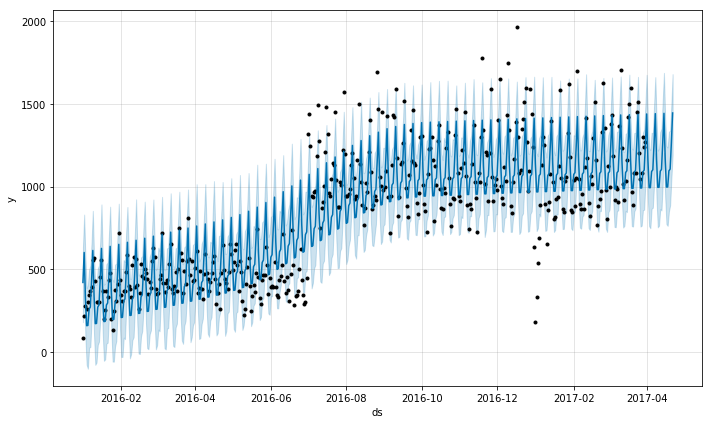

In [153]:
m1.plot(forecast1);


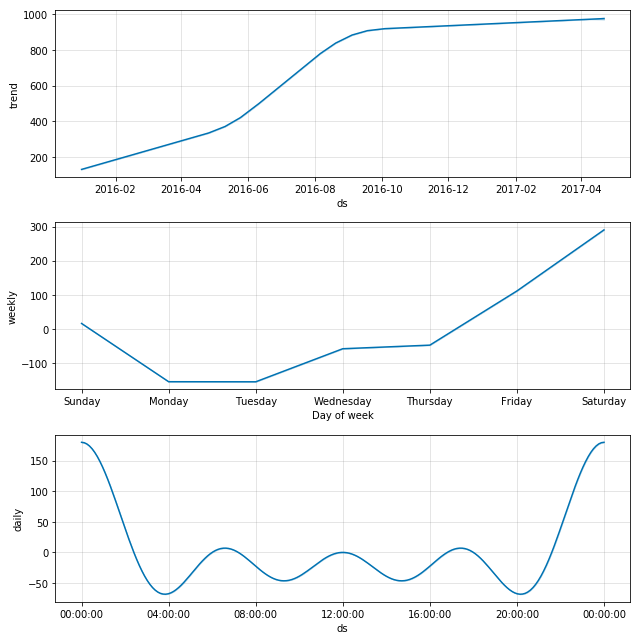

In [154]:
m1.plot_components(forecast1);

In [119]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(forecast['yhat'], actual['y'])
print(f"MSE: {MSE}")

MSE: 19446.893817536664


In [120]:
final.head()

,air_area_name,visit_date,holiday_flg,visitors
0,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-01,1,86
1,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-02,1,219
2,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-03,1,278
3,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-04,0,264
4,Fukuoka-ken Fukuoka-shi Daimyō,2016-01-05,0,302


In [146]:
def get_prediction(df):
    prediction = {}
    df2 = final.rename(columns={'visit_date': 'ds','visitors': 'y', 'air_area_name': 'article'})
    list_articles = df2.article.unique()

    for article in list_articles[2:5]:
        article_df = df2.loc[df2['article'] == article]
        # set the uncertainty interval to 95% (the Prophet default is 80%)
        my_model = Prophet(weekly_seasonality= True, daily_seasonality=True,seasonality_prior_scale=1.0)
        my_model.fit(article_df)
        future_dates = my_model.make_future_dataframe(periods=6, freq='MS')
        forecast = my_model.predict(future_dates)
        prediction[article] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
        
        
    df_temp = prediction
    print(df_temp)

    df_output = pd.DataFrame(list(df_temp.items()))
    df_output.to_csv('Tutorial.csv', index=True)
    return prediction

In [147]:
get_prediction(final)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'Fukuoka-ken Fukuoka-shi Imaizumi':             ds       yhat  yhat_lower  yhat_upper
0   2016-07-01  31.510052   16.703071   46.431912
1   2016-07-02  33.696243   18.915561   49.427026
2   2016-07-03  24.599034    9.608821   40.047344
3   2016-07-04  23.276354    7.008719   38.157852
4   2016-07-05  19.563718    4.865056   34.822795
5   2016-07-06  20.308842    5.122768   34.307642
6   2016-07-07  27.534764   13.042989   43.001067
7   2016-07-08  31.547412   15.995154   46.344385
8   2016-07-09  33.733604   17.665364   48.312327
9   2016-07-11  23.313714    7.714576   37.674648
10  2016-07-12  19.601079    5.475405   34.257690
11  2016-07-13  20.346203    5.329297   35.919832
12  2016-07-14  27.572124   12.890445   41.829517
13  2016-07-15  31.584772   16.919228   47.336703
14  2016-07-16  33.770964   18.714732   49.983012
15  2016-07-17  24.673754    9.950263   39.437357
16  2016-07-18  23.351075    8.052797   37.845146
17  2016-07-19  19.638439    3.821970   34.968825
18  2016-07-2

PermissionError: [Errno 13] Permission denied: 'Tutorial.csv'